In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from keras.models import Sequential
from keras.layers import GRU, Dropout, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import streamlit as st

In [2]:
start = '2010-01-01'
end = '2024-06-30'

st.title("Stock Price Prediction")

2024-07-19 19:17:54.495 
  command:

    streamlit run c:\Users\Arun\Desktop\project\work1\.venv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [3]:
user_input = st.text_input('Enter a stock Ticker', 'TSLA')
df = yf.download(user_input, start=start, end=end)

2024-07-19 19:17:54.513 Session state does not function when running a script without `streamlit run`
[*********************100%%**********************]  1 of 1 completed


In [4]:
st.subheader('Data from 2010-2024')
st.write(df.describe())

DeltaGenerator()

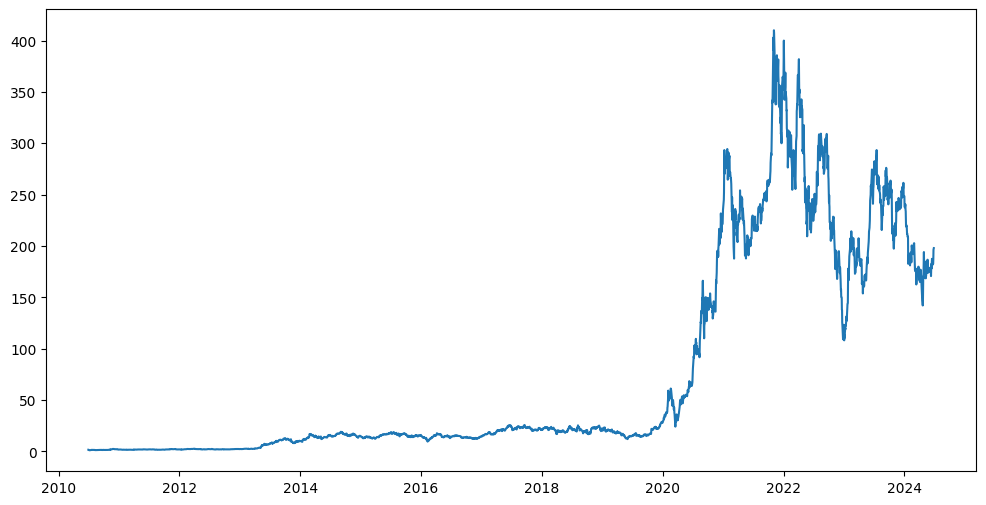

In [5]:
st.subheader('Closing price vs time chart')
fig = plt.figure(figsize=(12,6))
plt.plot(df['Close'])
st.pyplot(fig)


In [6]:
st.subheader('Closing price vs time chart with 100 MA')
ma100 = df['Close'].rolling(100).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(ma100, label='100 MA')
plt.plot(df['Close'], label='Close')
plt.legend()
st.pyplot(fig)

DeltaGenerator()

In [7]:
st.subheader('Closing price vs time chart with 100 MA and 200 MA')
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(ma100, 'r', label='100 MA')
plt.plot(ma200, 'g', label='200 MA')
plt.plot(df['Close'], 'b', label='Close')
plt.legend()
st.pyplot(fig)

DeltaGenerator()

In [8]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_training_array = scaler.fit_transform(data_training)

In [10]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
model = Sequential()
model.add(GRU(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(GRU(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(GRU(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

c:\Users\Arun\Desktop\project\work1\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 0.0180

In [ ]:
past_100_days = data_training.tail(100)

# Concatenate past_100_days and data_testing
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

# Scale the final_df
input_data = scaler.fit_transform(final_df)


In [ ]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
y_predicted = model.predict(x_test)
scale_factor = 1 / scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step


In [ ]:
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

In [ ]:
st.subheader('Prediction vs Original')
fig = plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
st.pyplot(fig)

DeltaGenerator()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_predicted)
accuracy = 100 - mape

print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')
print(f'Accuracy: {accuracy:.2f}%')

NameError: name 'mean_squared_error' is not defined